# 1. Objective
- Create a function to implent a Gradient Descent
- Find the slope and coeffiecnt
- validate via regression eqn
- Date: 11 Sep 2024

# 2. Creating Data Set

In [76]:
import numpy as np


# lets suppose we have two arrays, Area and Rent of the Room in benagluru

#Room area in square feet---------
area = np.array([ 2317,1335,841,521,1999,1627,2188,2117,2308,2256,1372])


# Room Rent in Rupees-------------
rent = np.array([52769,30839,19784,13531,45435,37036,50194,48122,52715,51072,31871])


# Create Gradient Descent Function

In [77]:
def grad_desc(x,y, learning_rate, iterations):
  # As per theory, we have to start with some value for slope(m) and coeffiecnt(b) to reach to global minima
  m_curr = 0
  b_curr = 0
  n = len(x) # no of observations

  #-----------
  # learning_rate  it can be adjusted as model behave, its generally started with 0.001
  # how many number of iteration, we are going to do we will fine tune it later

  #-----------
  for i in range(iterations):
    # at each steps we will calculate y_predicated value
    y_pred = (m_curr * x) + b_curr

    # calculate gradients : m_derivative and b_derivative
    # partial Derivative
    m_der = -(2/n) * sum(x * (y - y_pred))
    b_der = -(2/n) * sum(y-y_pred)

    # now updated m_curr and b_curr will become
    m_curr = m_curr - (learning_rate * m_der)
    b_curr = b_curr - (learning_rate * b_der)


    # print these values too
    # print("m: {}; b: {},Cost {},  iteration: {}".format(m_curr, b_curr, round(cost,2), i))

    # print 100 observation series only
    if i % 100 == 0:
            print(f"Iteration {i}: m = {m_curr}, b = {b_curr}")







In [78]:
grad_desc(area,rent, learning_rate = 0.001, iterations = 1000)


'''
 - here m and b grow exponetially large and eventually -inf,
 - suggest that learning rate is too high,
 - causing gradient descent to diverge rather than converge to an optimal solution

 - another reason: standardize the input variable as it is big

 '''

Iteration 0: m = 151002.97818181818, b = 78.79418181818183
Iteration 100: m = nan, b = nan
Iteration 200: m = nan, b = nan
Iteration 300: m = nan, b = nan
Iteration 400: m = nan, b = nan
Iteration 500: m = nan, b = nan
Iteration 600: m = nan, b = nan
Iteration 700: m = nan, b = nan
Iteration 800: m = nan, b = nan
Iteration 900: m = nan, b = nan


<ipython-input-77-ae728b6651fd>:18: RuntimeWarning: overflow encountered in multiply
  m_der = -(2/n) * sum(x * (y - y_pred))
<ipython-input-77-ae728b6651fd>:22: RuntimeWarning: invalid value encountered in scalar subtract
  m_curr = m_curr - (learning_rate * m_der)


'\n - here m and b grow exponetially large and eventually -inf,\n - suggest that learning rate is too high,\n - causing gradient descent to diverge rather than converge to an optimal solution\n\n - another reason: standardize the input variable as it is big\n\n '

In [79]:
# lets first check with bit lower gradient descent values

# grad_desc(area,rent, learning_rate = 0.03, iterations = 1000)

# noticed : even at differnt learning rate m and b are becoming infinity, need to standardize the area array


In [80]:
# standarised the array

area_mean = area.mean()
area_std = area.std()

print('mean:{}, std:{}'.format(area_mean, area_std))

area_scaled = (area - area_mean)/area_std
print(area_scaled)

mean:1716.4545454545455, std:597.8753843457778
[ 1.00446593 -0.63801681 -1.46427595 -1.99950454  0.47258252 -0.14962072
  0.7887019   0.66994806  0.98941263  0.90243798 -0.576131  ]


In [81]:
grad_desc(area_scaled,rent, learning_rate = 0.001, iterations = 1000)

Iteration 0: m = 26.353897579960417, b = 78.79418181818183
Iteration 100: m = 2412.3083491561783, b = 7212.438391255805
Iteration 200: m = 4365.371460715054, b = 13051.802737559266
Iteration 300: m = 5964.084091298642, b = 17831.712551924422
Iteration 400: m = 7272.737180930481, b = 21744.388055368156
Iteration 500: m = 8343.957158956051, b = 24947.174340004778
Iteration 600: m = 9220.82227348685, b = 27568.868875119733
Iteration 700: m = 9938.594948431079, b = 29714.900993597854
Iteration 800: m = 10526.13983345284, b = 31471.57164757924
Iteration 900: m = 11007.084572596144, b = 32909.5239316987


In [82]:


'''
- to know how well you are doing with model, you have to print cost also at each iteration
- at each iteration, our cost should reduce, for model to be getting better

- for regression cost function we use mse (mean square error) i.e. 1/n*sum(y_actual - y_predicated)^sqr

'''



'\n- to know how well you are doing with model, you have to print cost also at each iteration\n- at each iteration, our cost should reduce, for model to be getting better\n\n- for regression cost function we use mse (mean square error) i.e. 1/n*sum(y_actual - y_predicated)^sqr\n\n'

In [83]:
def grad_desc_2(x,y, learning_rate, iterations):
  # As per theory, we have to start with some value for slope(m) and coeffiecnt(b) to reach to global minima
  m_curr = 0
  b_curr = 0
  n = len(x) # no of observations

  #-----------
  # learning_rate  it can be adjusted as model behave, its generally started with 0.001
  # how many number of iteration, we are going to do we will fine tune it later

  #-----------
  for i in range(iterations):
    # at each steps we will calculate y_predicated value
    y_pred = m_curr * x + b_curr


    # Compute cost (mean Squared error)
    cost = (1/n) * sum(val**2 for val in y - y_pred)

    # calculate gradients : m_derivative and b_derivative
    # partial Derivative
    m_der = -(2/n) * sum(x * (y - y_pred))
    b_der = -(2/n) * sum(y-y_pred)

    # now updated m_curr and b_curr will become
    m_curr = m_curr - (learning_rate * m_der)
    b_curr = b_curr - (learning_rate * b_der)


    # print these values too

    # print("m: {}; b: {},Cost {},  iteration: {}".format(m_curr, b_curr, round(cost,2), i))

    # print 100 observation series only
    if i % 100 == 0:
            print(f"Iteration {i}: m = {m_curr}, b = {b_curr},  Cost {round(cost,2)}")

In [84]:
grad_desc_2(area_scaled,rent, learning_rate = 0.001, iterations = 1000)

Iteration 0: m = 26.353897579960417, b = 78.79418181818183,  Cost 1725841453.64
Iteration 100: m = 2412.3083491561783, b = 7212.438391255805,  Cost 1156428818.7
Iteration 200: m = 4365.371460715054, b = 13051.802737559266,  Cost 774892963.78
Iteration 300: m = 5964.084091298642, b = 17831.712551924422,  Cost 519244248.5
Iteration 400: m = 7272.737180930481, b = 21744.388055368156,  Cost 347946414.27
Iteration 500: m = 8343.957158956051, b = 24947.174340004778,  Cost 233168024.01
Iteration 600: m = 9220.82227348685, b = 27568.868875119733,  Cost 156260578.4
Iteration 700: m = 9938.594948431079, b = 29714.900993597854,  Cost 104728620.36
Iteration 800: m = 10526.13983345284, b = 31471.57164757924,  Cost 70199548.72
Iteration 900: m = 11007.084572596144, b = 32909.5239316987,  Cost 47063288.54


# 5. Gradient Descent : When to stop iteration

- fixed Number of iteration, to obtain optimal results , the number of iteration shouldn't be too low or excessively high
- Convergence Criteria: Have to stop, when change in cost between iteration is less than a small threshold, i.e. set a **tolerance level** i.e. 1e-6
- Early stopping: Montior the performance on a validation set during training, if the performance (cost) on the validation set starts to worsen, stop training
- Gradient Magnitude: Stop when graidents become very small


In [85]:
grad_desc_2(area_scaled,rent, learning_rate = 0.01, iterations = 1000)

'''
- with increase in learning rate
- after iteration 543 cost function is around 5702 only ( no drastic change)

'''

Iteration 0: m = 263.53897579960415, b = 787.9418181818182,  Cost 1725841453.64
Iteration 100: m = 11464.378115336627, b = 34276.762703180226,  Cost 30431325.25
Iteration 200: m = 12949.8284276706, b = 38718.03525638767,  Cost 612542.44
Iteration 300: m = 13146.82818839605, b = 39307.03485000158,  Cost 88091.28
Iteration 400: m = 13172.95420917483, b = 39385.147714528845,  Cost 78867.26
Iteration 500: m = 13176.419030447809, b = 39395.50700793213,  Cost 78705.03
Iteration 600: m = 13176.878533506291, b = 39396.880852822665,  Cost 78702.17
Iteration 700: m = 13176.939472597838, b = 39397.063051521895,  Cost 78702.12
Iteration 800: m = 13176.947554313092, b = 39397.08721463248,  Cost 78702.12
Iteration 900: m = 13176.94862610658, b = 39397.09041913346,  Cost 78702.12


'\n- with increase in learning rate\n- after iteration 543 cost function is around 5702 only ( no drastic change)\n\n'

In [86]:
grad_desc_2(area_scaled,rent, learning_rate = 0.01, iterations = 540)

Iteration 0: m = 263.53897579960415, b = 787.9418181818182,  Cost 1725841453.64
Iteration 100: m = 11464.378115336627, b = 34276.762703180226,  Cost 30431325.25
Iteration 200: m = 12949.8284276706, b = 38718.03525638767,  Cost 612542.44
Iteration 300: m = 13146.82818839605, b = 39307.03485000158,  Cost 88091.28
Iteration 400: m = 13172.95420917483, b = 39385.147714528845,  Cost 78867.26
Iteration 500: m = 13176.419030447809, b = 39395.50700793213,  Cost 78705.03


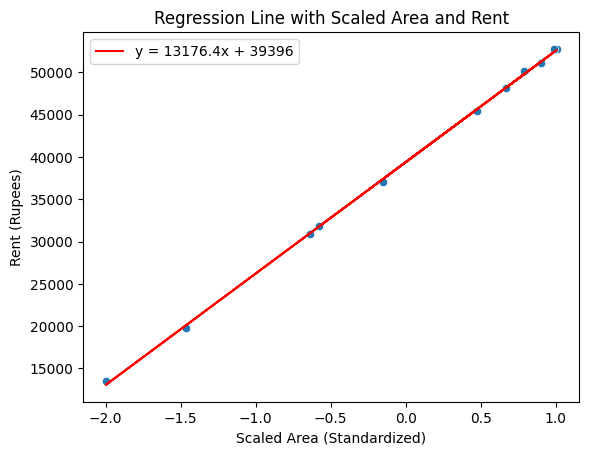

In [87]:
# so we have equation
m = 13176.4
b = 39396

# lets plot the data see the accuracy


import matplotlib.pyplot as plt
import seaborn as sns



sns.scatterplot(x = area_scaled, y  = rent)

plt.plot(area_scaled, m * area_scaled + b, color = 'red', label=f'y = {round(m, 2)}x + {round(b, 2)}')
# Adding labels and showing plot
plt.xlabel('Scaled Area (Standardized)')
plt.ylabel('Rent (Rupees)')
plt.title('Regression Line with Scaled Area and Rent')
plt.legend()
plt.show()


# Happy Learning